In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs.random_design import RandomDesign
from emukit.core.initial_designs.latin_design import LatinDesign

In [2]:
import pandas as pd

# Assuming your data is in an Excel file named 'your_data.xlsx'.
file_path = './器件薄膜数据.xlsx'
sheet_name = '2022_07_15_film'

df_film = pd.read_excel(file_path, sheet_name=sheet_name)
print(df_film.columns)

# Renaming the columns
df_film.columns = ['Condition', 'NMP (mL)', 'DMF (mL)', 'DMSO (mL)', 'Perovskite concentration (M)',  'Annealing temperature (℃)', 'Vacuum Pressure (Pa)', 'Vacuum Pressure time (s)', 'Temperature (℃)', 'Humidity (%)', 'Success or Fail']

# Filter the successful conditions
success_conditions = df_film[df_film['Success or Fail'] == 1]['Condition'].values

# Display the DataFrame or without the 'Success or Fail' column
df_film.iloc[:, :]

Index(['Condition', 'NMP(mL)', 'DMF(mL)', 'DMSO(mL)',
       'Perovskite concentration(M)', 'Annealing temperature(℃)',
       'Vacuum Pressure(Pa)', 'Vacuum Pressure time(s)', 'Temperature(℃)',
       'humidity(%)', 'Success or Fail'],
      dtype='object')


,Condition,NMP (mL),DMF (mL),DMSO (mL),Perovskite concentration (M),Annealing temperature (℃),Vacuum Pressure (Pa),Vacuum Pressure time (s),Temperature (℃),Humidity (%),Success or Fail
0,1,0,100,0,0.80,110,200,20,25,30,0
1,2,100,0,0,1.30,100,250,25,25,30,1
2,3,0,0,100,1.20,115,100,20,25,30,0
3,4,15,85,0,1.40,125,100,15,25,30,1
4,5,0,15,85,1.10,135,120,17,25,30,1
5,6,15,85,0,1.50,145,100,15,25,30,1
6,7,0,85,15,1.65,155,50,15,25,30,1
7,8,85,0,15,1.70,105,200,15,25,30,1
8,9,15,0,85,1.15,115,100,20,25,30,0
9,10,70,30,0,1.25,120,100,5,25,30,0


In [3]:
import pandas as pd

# Assuming your data is in an Excel file named 'your_data.xlsx' and the sheet name is '2022-device'.
file_path = './器件薄膜数据.xlsx'
sheet_name = '2022_07_15_device'

df_device = pd.read_excel(file_path, sheet_name=sheet_name)
print(df_device.columns)

# Assuming you don't need to scale any columns, comment these lines if needed
# df_device.iloc[:,3] = df_device.iloc[:,3] / 10
# df_device.iloc[:,4] = df_device.iloc[:,4] / 1000

df_device.columns = ['Condition', 'NMP (mL)', 'DMF (mL)', 'DMSO (mL)', 'Perovskite concentration (M)', 'Annealing temperature (℃)', 'Vacuum Pressure (Pa)', 'Vacuum Pressure time (s)', 'Temperature (℃)', 'Humidity (%)',
                     'Voc(V)', 'FF(%)', 'Eff(%)', 'Jsc(mA/cm^2)']
# Filter data based on success_conditions
success_conditions = [0, 2, 4, 5, 6, 7, 8, 11, 12, 17, 18]
df_device = df_device.sort_values(by=list(df_device.iloc[:,[0,-1]].columns)).drop_duplicates('Condition', keep = 'last', ignore_index = True)
df_device = df_device[df_device['Condition'].isin(success_conditions)]

# Display the DataFrame or without the 'Success or Fail' column
df_device.iloc[:, :]

Index(['Condition', 'NMP(mL)', 'DMF(mL)', 'DMSO(mL)',
       'Perovskite concentration(M)', 'Annealing temperature(℃)',
       'Vacuum Pressure(Pa)', 'Vacuum Pressure time(s)', 'Temperature(℃)',
       'humidity(%)', 'Voc (V)', 'FF (%)', 'Eff (%)', 'Jsc (mA/cm^2)'],
      dtype='object')


,Condition,NMP (mL),DMF (mL),DMSO (mL),Perovskite concentration (M),Annealing temperature (℃),Vacuum Pressure (Pa),Vacuum Pressure time (s),Temperature (℃),Humidity (%),Voc(V),FF(%),Eff(%),Jsc(mA/cm^2)
1,2,100,0,0,1.30,100,250,25,25,30,0.936879,65.7897,16.20070,26.284000
3,4,15,85,0,1.40,125,100,15,25,30,0.945263,71.2711,17.58020,26.095100
4,5,0,15,85,1.10,135,120,17,25,30,1.003680,74.1679,18.97360,25.488000
5,6,15,85,0,1.50,145,100,15,25,30,0.965233,63.3308,15.94070,26.077100
6,7,0,85,15,1.65,155,50,15,25,30,1.011440,77.0517,20.08790,25.775800
7,8,85,0,15,1.70,105,200,15,25,30,1.000000,63.0401,16.11380,25.561186
10,11,0,30,70,1.30,130,80,35,25,30,1.002430,74.1347,18.93960,25.485700
11,12,30,70,0,1.35,135,200,18,25,30,0.671699,38.9482,6.79034,25.955500
16,17,55,45,0,1.00,125,70,45,25,30,0.989165,54.1555,13.73140,25.633200
17,18,45,55,0,1.20,115,270,47,25,30,0.527735,53.4573,7.06208,25.032800


In [4]:
# Load the dataset
df_previous = pd.read_excel("./限制性数据.xlsx")

# Modify the necessary columns
#df_previous.iloc[:, 2] = df_previous.iloc[:, 2] / 10
#df_previous.iloc[:, 3] = df_previous.iloc[:, 3] / 1000

# Change the column names
df_previous.columns = [
    '',
    'NMP (mL)',
    'DMF (mL)',
    'DMSO (mL)',
    'Perovskite concentration (M)',
    'Annealing temperature (℃)',
    'Vacuum Pressure (Pa)',
    'Vacuum Pressure time (s)',
    'Temperature (℃)',
    'Humidity (%)',
    'Voc(V)',
    'FF(%)',
    'Eff(%)',
    'Jsc(mA/cm^2)'
]

# Remove the first column
df_previous = df_previous.iloc[:, 1:]

df_previous

,NMP (mL),DMF (mL),DMSO (mL),Perovskite concentration (M),Annealing temperature (℃),Vacuum Pressure (Pa),Vacuum Pressure time (s),Temperature (℃),Humidity (%),Voc(V),FF(%),Eff(%),Jsc(mA/cm^2)
0,0,95,5,1.0,100,150,5,25,40,1.050000,63.5338,16.38920,24.567646
1,0,95,5,1.0,100,150,5,25,40,1.050000,67.8805,15.27600,21.432626
2,0,95,5,1.2,100,150,5,25,40,1.000000,73.5429,18.22120,24.776335
3,0,95,5,1.2,100,150,5,25,40,1.100000,71.5113,19.02740,24.188674
4,0,95,5,1.0,100,150,5,25,30,1.000000,63.0401,16.11380,25.561186
5,0,95,5,1.0,100,150,5,25,30,1.050000,66.0396,17.46200,25.182592
6,0,95,5,1.0,100,150,10,25,40,1.100000,74.5926,19.83960,24.179328
7,0,95,5,1.0,100,150,10,25,40,1.011410,73.9667,18.02200,24.090100
8,0,95,5,1.0,100,150,10,25,40,1.100000,67.9169,17.99010,24.080419
9,0,95,5,1.0,140,150,10,25,40,1.050000,74.4700,18.65060,23.851920


In [5]:
import numpy as np

## Total process conditions: NMP x DMF x DMSO x PC x AT x VP x VT x T = 1871100000 conditions

NMP_min, NMP_max, NMP_step = [0, 50, 5] ## Unit: ml ## 10 steps
NMP_var = np.arange(NMP_min, NMP_max+NMP_step, NMP_step)
NMP_num = len(NMP_var)

DMF_min, DMF_max, DMF_step = [0, 100, 5] ## Unit: ml ## 50 steps
DMF_var = np.arange(DMF_min, DMF_max+DMF_step, DMF_step)
DMF_num = len(DMF_var)

DMSO_min, DMSO_max, DMSO_step = [0, 50, 5] ## Unit: ml ## 10 steps
DMSO_var =np.arange(DMSO_min, DMSO_max+DMSO_step, DMSO_step)
DMSO_num = len(DMSO_var)

PC_min, PC_max, PC_step = [0.8, 1.8, 0.1] ## Unit: M ## 10 steps
PC_var = np.arange(PC_min, PC_max+PC_step, PC_step)
PC_num = len(PC_var)

AT_min, AT_max, AT_step = [100, 170, 10] ## Unit: °C ## 7 steps
AT_var = np.arange(AT_min, AT_max+AT_step, AT_step)
AT_num = len(AT_var)

VP_min, VP_max, VP_step = [20, 350, 10] ## Unit: Pa ## 33 steps
VP_var = np.arange(VP_min, VP_max+VP_step, VP_step)
VP_num = len(VP_var)

VT_min, VT_max, VT_step = [5, 50, 5] ## Unit: s ## 9 steps
VT_var = np.arange(VT_min, VT_max+VT_step, VT_step)
VT_num = len(VT_var)

T_min, T_max, T_step = [15, 30, 5] ## Unit: °C ## 3 steps
T_var = np.arange(T_min, T_max+T_step, T_step)
T_num = len(T_var)

humidity_min, humidity_max, humidity_step = [15, 45, 5]  # Unit: [%] ## 6 steps
humidity_var = np.arange(humidity_min, humidity_max + humidity_step, humidity_step)
humidity_num = len(humidity_var)

var_array = [NMP_var, DMF_var,
DMSO_var, PC_var,
AT_var, VP_var,
VT_var, T_var, humidity_var]

x_labels = ['NMP [ml]',
'Dimethylformamide [ml]',
'Dimethyl Sulfoxide [ml]',
'Perovskite Concentration [M]',
'Annealing Temperature [\N{DEGREE SIGN}C]',
'Vacuum Pressure [Pa]',
'Vacuum Time [s]',
'Temperature [\N{DEGREE SIGN}C]',
'Humidity [%]']

def x_normalizer(X):  
    
    def max_min_scaler(x, x_max, x_min):
        return (x-x_min)/(x_max-x_min)

    x_norm = []
    for x in (X):
        x_norm.append([max_min_scaler(x[i], 
                                     max(var_array[i]), 
                                     min(var_array[i])) for i in range(len(x))])  
    return np.array(x_norm)

def x_denormalizer(x_norm):
    def max_min_rescaler(x, x_max, x_min):
        return x*(x_max-x_min)+x_min
    x_original = []
    for x in (x_norm):
           x_original.append([max_min_rescaler(x[i],
                                        max(var_array[i]),
                                        min(var_array[i])) for i in range(len(x))])
    return np.array(x_original)

def get_closest_array(suggested_x):
    
    def get_closest_value(given_value, array_list):
        absolute_difference_function = lambda list_value : abs(list_value - given_value)
        closest_value = min(array_list, key=absolute_difference_function)
        return closest_value

    var_list = var_array
    modified_array = []
    for x in suggested_x:
        modified_array.append([get_closest_value(x[i], var_list[i]) for i in range(len(x))])
    return np.array(modified_array)

In [6]:
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs.random_design import RandomDesign
from emukit.core.initial_designs.latin_design import LatinDesign

parameter_space = ParameterSpace([ContinuousParameter('NMP', 0 - 1 / (NMP_num - 1) / 2, 1 + 1 / (NMP_num - 1) / 2),
                                ContinuousParameter('DMF', 0 - 1 / (DMF_num - 1) / 2, 1 + 1 / (DMF_num - 1) / 2),
                                ContinuousParameter('DMSO', 0 - 1 / (DMSO_num - 1) / 2, 1 + 1 / (DMSO_num - 1) / 2),
                                ContinuousParameter('PC', 0 - 1 / (PC_num - 1) / 2, 1 + 1 / (PC_num - 1) / 2),
                                ContinuousParameter('AT', 0 - 1 / (AT_num - 1) / 2, 1 + 1 / (AT_num - 1) / 2),
                                ContinuousParameter('VP', 0 - 1 / (VP_num - 1) / 2, 1 + 1 / (VP_num - 1) / 2),
                                ContinuousParameter('VT', 0 - 1 / (VT_num - 1) / 2, 1 + 1 / (VT_num - 1) / 2),
                                ContinuousParameter('T', 0 - 1 / (T_num - 1) / 2, 1 + 1 / (T_num - 1) / 2),
                                ContinuousParameter('humidity', 0 - 1 / (humidity_num - 1) / 2, 1 + 1 / (humidity_num - 1) / 2),
                                ])

In [7]:
from typing import Union
from emukit.core.acquisition import Acquisition
from emukit.core.interfaces import IModel, IDifferentiable
from emukit.core.loop import FixedIntervalUpdater, OuterLoop, SequentialPointCalculator
from emukit.core.loop.loop_state import create_loop_state
from emukit.core.optimization import AcquisitionOptimizerBase
from emukit.core.optimization import GradientAcquisitionOptimizer
from emukit.bayesian_optimization.acquisitions.log_acquisition import LogAcquisition
from emukit.bayesian_optimization.local_penalization_calculator import LocalPenalizationPointCalculator
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement, \
                                                      NegativeLowerConfidenceBound, \
                                                      MaxValueEntropySearch, \
                                                      MultipointExpectedImprovement,\
                                                      ProbabilityOfFeasibility
from emukit.core.acquisition import IntegratedHyperParameterAcquisition


class ScaledProbabilityOfFeasibility(ProbabilityOfFeasibility):
    def __init__(self, model: Union[IModel, IDifferentiable], max_value: float, min_value: float) -> None:
        super().__init__(model)
        self.max_value = max_value
        self.min_value = min_value

    def evaluate(self, x: np.ndarray) -> np.ndarray:
        original_pf = super().evaluate(x)
        return self.min_value + (self.max_value - self.min_value) * original_pf

class ProbabilisticConstraintBayesianOptimizationLoop2(OuterLoop):
    def __init__(self, space: ParameterSpace, model_objective: Union[IModel, IDifferentiable],
                 model_constraint1: Union[IModel, IDifferentiable], 
                 model_constraint2: Union[IModel, IDifferentiable],
                 acquisition: Acquisition = None,
                 update_interval: int = 1, batch_size: int = 1):

        self.model_objective = model_objective
        self.model_constraint1 = model_constraint1
        self.model_constraint2 = model_constraint2
        
        if acquisition is None:
            acquisition = ExpectedImprovement(model_objective)
        
        acquisition_constraint1 = ScaledProbabilityOfFeasibility(model_constraint1, max_value = 1, min_value = 0.2)
        acquisition_constraint2 = ScaledProbabilityOfFeasibility(model_constraint2, max_value = 1, min_value = 0.8)
        acquisition_constraint = acquisition_constraint1 * acquisition_constraint2
        acquisition_constrained = acquisition * acquisition_constraint

        model_updater_objective = FixedIntervalUpdater(model_objective, update_interval)
        model_updater_constraint1 = FixedIntervalUpdater(model_constraint1, update_interval,
                                                         lambda state: state.Y_constraint1)
        model_updater_constraint2 = FixedIntervalUpdater(model_constraint2, update_interval,
                                                         lambda state: state.Y_constraint2)

        acquisition_optimizer = GradientAcquisitionOptimizer(space)
        
        if batch_size == 1:
            candidate_point_calculator = SequentialPointCalculator(acquisition_constrained, acquisition_optimizer)
        else:
            log_acquisition = LogAcquisition(acquisition_constrained)
            candidate_point_calculator = LocalPenalizationPointCalculator(log_acquisition, acquisition_optimizer,
                                                                          model_objective, space, batch_size)
        loop_state = create_loop_state(model_objective.X, model_objective.Y)
        super(ProbabilisticConstraintBayesianOptimizationLoop2, self).__init__(candidate_point_calculator,
                                                                               [model_updater_objective, model_updater_constraint1, model_updater_constraint2],
                                                                               loop_state)

In [8]:
from typing import Tuple, Union
import scipy.stats
import numpy as np
from emukit.core.acquisition import Acquisition
from emukit.core.interfaces import IModel, IDifferentiable

class ScaledProbabilityOfFeasibility(Acquisition):

    def __init__(self, model: Union[IModel, IDifferentiable], jitter: float = float(0),
                 max_value: float = float(1), min_value: float = float(0)) -> None:
        """
        This acquisition computes for a given input point the probability of satisfying the constraint
        C<0. For more information see:
        Michael A. Gelbart, Jasper Snoek, and Ryan P. Adams,
        Bayesian Optimization with Unknown Constraints,
        https://arxiv.org/pdf/1403.5607.pdf
        :param model: The underlying model that provides the predictive mean and variance for the given test points
        :param jitter: Jitter to balance exploration / exploitation
        """
        self.model = model
        self.jitter = jitter
        self.max_value = max_value
        self.min_value = min_value

    def evaluate(self, x: np.ndarray) -> np.ndarray:
        """
        Computes the probability of of satisfying the constraint C<0.
        :param x: points where the acquisition is evaluated, shape (number of points, number of dimensions).
        :return: numpy array with the probability of satisfying the constraint at the points x.
        """
        mean, variance = self.model.predict(x)
        mean += self.jitter

        standard_deviation = np.sqrt(variance)
        cdf = scipy.stats.norm.cdf(0, mean, standard_deviation)
        return cdf*(self.max_value-self.min_value)+self.min_value

    def evaluate_with_gradients(self, x: np.ndarray) -> Tuple:
        """
        Computes the  probability of of satisfying the constraint C<0.
        :param x: points where the acquisition is evaluated, shape (number of points, number of dimensions).
        :return: tuple of numpy arrays with the probability of satisfying the constraint at the points x 
        and its gradient.
        """
        mean, variance = self.model.predict(x)
        standard_deviation = np.sqrt(variance)

        dmean_dx, dvariance_dx = self.model.get_prediction_gradients(x)
        dstandard_devidation_dx = dvariance_dx / (2 * standard_deviation)

        mean += self.jitter
        u = - mean / standard_deviation
        pdf = scipy.stats.norm.pdf(0, mean, standard_deviation)
        cdf = scipy.stats.norm.cdf(0, mean, standard_deviation)
        dcdf_dx = - pdf * (dmean_dx + dstandard_devidation_dx * u)

        return cdf*(self.max_value-self.min_value)+self.min_value, dcdf_dx

    @property
    def has_gradients(self):
        return isinstance(self.model, IDifferentiable)

In [9]:
from typing import Tuple, Union
import scipy.stats
import numpy as np
from emukit.core.acquisition import Acquisition
from emukit.core.interfaces import IModel, IDifferentiable

class ScaledProbabilityOfFeasibility(Acquisition):

    def __init__(self, model: Union[IModel, IDifferentiable], jitter: float = float(0),
                 max_value: float = float(1), min_value: float = float(0)) -> None:
        """
        This acquisition computes for a given input point the probability of satisfying the constraint
        C<0. For more information see:
        Michael A. Gelbart, Jasper Snoek, and Ryan P. Adams,
        Bayesian Optimization with Unknown Constraints,
        https://arxiv.org/pdf/1403.5607.pdf
        :param model: The underlying model that provides the predictive mean and variance for the given test points
        :param jitter: Jitter to balance exploration / exploitation
        """
        self.model = model
        self.jitter = jitter
        self.max_value = max_value
        self.min_value = min_value

    def evaluate(self, x: np.ndarray) -> np.ndarray:
        """
        Computes the probability of of satisfying the constraint C<0.
        :param x: points where the acquisition is evaluated, shape (number of points, number of dimensions).
        :return: numpy array with the probability of satisfying the constraint at the points x.
        """
        mean, variance = self.model.predict(x)
        mean += self.jitter

        standard_deviation = np.sqrt(variance)
        cdf = scipy.stats.norm.cdf(0, mean, standard_deviation)
        return cdf*(self.max_value-self.min_value)+self.min_value

    def evaluate_with_gradients(self, x: np.ndarray) -> Tuple:
        """
        Computes the  probability of of satisfying the constraint C<0.
        :param x: points where the acquisition is evaluated, shape (number of points, number of dimensions).
        :return: tuple of numpy arrays with the probability of satisfying the constraint at the points x 
        and its gradient.
        """
        mean, variance = self.model.predict(x)
        standard_deviation = np.sqrt(variance)

        dmean_dx, dvariance_dx = self.model.get_prediction_gradients(x)
        dstandard_devidation_dx = dvariance_dx / (2 * standard_deviation)

        mean += self.jitter
        u = - mean / standard_deviation
        pdf = scipy.stats.norm.pdf(0, mean, standard_deviation)
        cdf = scipy.stats.norm.cdf(0, mean, standard_deviation)
        dcdf_dx = - pdf * (dmean_dx + dstandard_devidation_dx * u)

        return cdf*(self.max_value-self.min_value)+self.min_value, dcdf_dx

    @property
    def has_gradients(self):
        return isinstance(self.model, IDifferentiable)

In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from emukit.core.interfaces import IModel

class RandomForestWrapper(IModel):
    def __init__(self, rf_model):
        self.rf_model = rf_model

    def predict(self, X):
        mean = self.rf_model.predict(X)
        # Random forest does not provide variance, so we create an array of zeros
        variance = np.zeros(mean.shape)
        return mean.reshape(-1, 1), variance.reshape(-1, 1)

    def set_data(self, X, Y):
        self.rf_model.fit(X, Y.ravel())

    def optimize(self):
        # The optimization is done during the training in the set_data method
        pass

# Load your data here
# df_device = ...
# df_film = ...
# df_previous = ...

# Preprocess your data
x_init = x_normalizer(df_device.iloc[:, 1:10].values)
y_init = np.transpose([df_device.iloc[:, -2].values])
xc_init = x_normalizer(df_film.iloc[:, 1:-1].values)
yc_init = np.transpose([df_film.iloc[:, -1].values])
X, Y, Xc, Yc = [x_init, y_init, xc_init, yc_init]

Xc2 = x_normalizer(df_previous.iloc[:, 0:9].values)
Yc2 = np.transpose([df_previous.iloc[:, -2].values])

# Define random forest model
def create_rf():
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    return model

# Objective model
rf_objective = create_rf()
rf_objective.fit(X, -Y.ravel())  # Emukit is a minimization tool; need to make Y negative
objective_model = RandomForestWrapper(rf_objective)

# Constraint model 1
rf_constraint1 = create_rf()
yc_offset = 0.5  # constraint acquisition computes the probability of <0
rf_constraint1.fit(Xc, -(Yc.ravel() - yc_offset))  # Emukit is a minimization tool; need to make Y negative
constraint_model1 = RandomForestWrapper(rf_constraint1)

# Constraint model 2
rf_constraint2 = create_rf()
yc2_offset = np.mean(Yc2)  # constraint acquisition computes the probability of <0
rf_constraint2.fit(Xc2, -(Yc2.ravel() - yc2_offset))  # Emukit is a minimization tool; need to make Y negative
constraint_model2 = RandomForestWrapper(rf_constraint2)


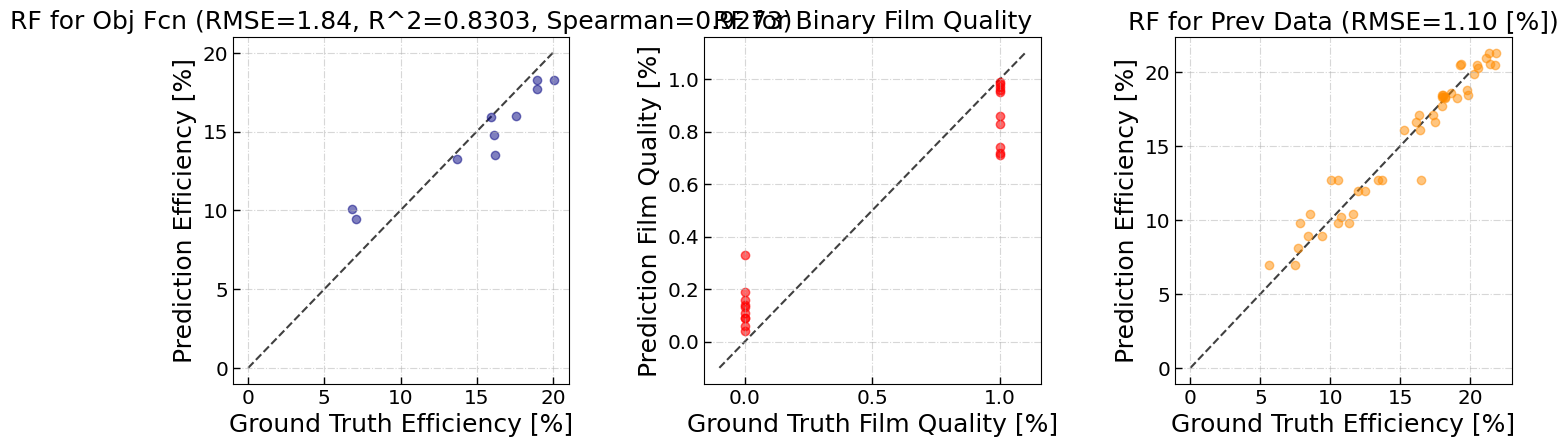

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import spearmanr

# Random Forest model predictions
y_pred, _ = objective_model.predict(X)
y_pred = -y_pred
yc_pred, _ = constraint_model1.predict(Xc)
yc_pred = -yc_pred + yc_offset
yc2_pred, _ = constraint_model2.predict(Xc2)
yc2_pred = -yc2_pred + yc2_offset

fig, axes = plt.subplots(1, 3, figsize=(5.5 * 3, 4.5))
fs = 18
lims1 = (0, 20)

r2 = r2_score(Y[:, -1], y_pred)
spearman_corr, _ = spearmanr(Y[:, -1], y_pred)
rmse_value = np.sqrt(mean_squared_error(Y[:, -1], y_pred))
title = f'RF for Obj Fcn (RMSE={rmse_value:.2f}, R^2={r2:.4f}, Spearman={spearman_corr:.4f})'

axes[0].scatter(Y[:, -1], y_pred, alpha=0.5, c='navy', edgecolor='navy')
axes[0].plot(lims1, lims1, 'k--', alpha=0.75, zorder=0)
axes[0].set_xlabel('Ground Truth Efficiency [%]', fontsize=fs)
axes[0].set_ylabel('Prediction Efficiency [%]', fontsize=fs)
axes[0].set_title(title, fontsize=fs)

lims2 = (-.1, 1.1)
axes[1].scatter(Yc[:, -1], yc_pred, alpha=0.6, edgecolor='r', c='r')
axes[1].plot(lims2, lims2, 'k--', alpha=0.75, zorder=0)
title = 'RF for Binary Film Quality'
axes[1].set_xlabel('Ground Truth Film Quality [%]', fontsize=fs)
axes[1].set_ylabel('Prediction Film Quality [%]', fontsize=fs)
axes[1].set_title(title, fontsize=fs)

lims3 = (0, 17)
rmse_value = np.sqrt(mean_squared_error(Yc2[:, -1], yc2_pred))
title = f'RF for Prev Data (RMSE={rmse_value:.2f} [%])'
axes[2].scatter(Yc2[:, -1], yc2_pred, alpha=0.5, c='darkorange', edgecolor='darkorange')
axes[2].plot(lims1, lims1, 'k--', alpha=0.75, zorder=0)
axes[2].set_xlabel('Ground Truth Efficiency [%]', fontsize=fs)
axes[2].set_ylabel('Prediction Efficiency [%]', fontsize=fs)
axes[2].set_title(title, fontsize=fs)

for i in range(len(axes)):
    axes[i].tick_params(direction='in', length=5, width=1, labelsize=fs * 0.8, grid_alpha=0.5)
    axes[i].grid(True, linestyle='-.')

plt.subplots_adjust(wspace=0.4)
plt.show()

# Save the figure
plt.savefig('round1_rf.png', dpi=600)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import spearmanr

# Linear Regression model predictions
y_pred, _ = objective_model.predict(X)
y_pred = -y_pred[:, -1]

mse = mean_squared_error
mse_all = mse(Y[:, -1], y_pred)
print('RF Model')
print('RMSE: {:.4f}'.format(np.sqrt(mse_all)))

rsquared_all = r2_score(Y[:, -1], y_pred)
print('R^2: {:.4f}'.format(rsquared_all))

sprman_all = spearmanr(Y[:, -1], y_pred)
print('Spearman: {:.4f}'.format(sprman_all[0]))

RF Model
RMSE: 1.8390
R^2: 0.8303
Spearman: 0.9273
